In [23]:
#Q1: Comparing winners' booking performances Vs non-winners's booking performances


In [24]:
import pandas as pd


In [25]:
tournament_data= pd.read_csv('tournaments.csv')
bookings_data= pd.read_csv('bookings.csv')



In [26]:
tournament_data = tournament_data.rename( columns={'winner': 'team_name'} )
#display of dataframe
tournament_data.head() 

,key_id,tournament_id,tournament_name,year,start_date,end_date,host_country,team_name,host_won,count_teams,group_stage,second_group_stage,final_round,round_of_16,quarter_finals,semi_finals,third_place_match,final
0,1,WC-1930,1930 FIFA World Cup,1930,1930-07-13,1930-07-30,Uruguay,Uruguay,1,13,1,0,0,0,0,1,0,1
1,2,WC-1934,1934 FIFA World Cup,1934,1934-05-27,1934-06-10,Italy,Italy,1,16,0,0,0,1,1,1,1,1
2,3,WC-1938,1938 FIFA World Cup,1938,1938-06-04,1938-06-19,France,Italy,0,15,0,0,0,1,1,1,1,1
3,4,WC-1950,1950 FIFA World Cup,1950,1950-06-24,1950-07-16,Brazil,Uruguay,0,13,1,0,1,0,0,0,0,0
4,5,WC-1954,1954 FIFA World Cup,1954,1954-06-16,1954-07-04,Switzerland,West Germany,0,16,1,0,0,0,1,1,1,1


In [27]:
bookings_data=bookings_data[['booking_id', 'yellow_card', 'red_card', 'team_name', 'tournament_id' ]]
bookings_data

,booking_id,yellow_card,red_card,team_name,tournament_id
0,B-0001,1,0,Soviet Union,WC-1970
1,B-0002,1,0,Soviet Union,WC-1970
2,B-0003,1,0,Soviet Union,WC-1970
3,B-0004,1,0,Mexico,WC-1970
4,B-0005,1,0,Soviet Union,WC-1970
...,...,...,...,...,...
2461,B-2462,1,0,England,WC-2018
2462,B-2463,1,0,Belgium,WC-2018
2463,B-2464,1,0,France,WC-2018
2464,B-2465,1,0,France,WC-2018


In [28]:
winner_booking_info= tournament_data.merge( bookings_data, on=['tournament_id', 'team_name'], how='inner' )
winner_booking_info = winner_booking_info.sort_values('tournament_id')
winner_booking_info.head() 

,key_id,tournament_id,tournament_name,year,start_date,end_date,host_country,team_name,host_won,count_teams,...,second_group_stage,final_round,round_of_16,quarter_finals,semi_finals,third_place_match,final,booking_id,yellow_card,red_card
0,9,WC-1970,1970 FIFA World Cup,1970,1970-05-31,1970-06-21,Mexico,Brazil,0,16,...,0,0,0,1,1,1,1,B-0007,1,0
1,9,WC-1970,1970 FIFA World Cup,1970,1970-05-31,1970-06-21,Mexico,Brazil,0,16,...,0,0,0,1,1,1,1,B-0042,1,0
2,9,WC-1970,1970 FIFA World Cup,1970,1970-05-31,1970-06-21,Mexico,Brazil,0,16,...,0,0,0,1,1,1,1,B-0052,1,0
3,10,WC-1974,1974 FIFA World Cup,1974,1974-06-13,1974-07-07,West Germany,West Germany,1,16,...,1,0,0,0,0,1,1,B-0113,1,0
4,10,WC-1974,1974 FIFA World Cup,1974,1974-06-13,1974-07-07,West Germany,West Germany,1,16,...,1,0,0,0,0,1,1,B-0114,1,0


In [29]:
winner_booking_info=winner_booking_info.groupby(['tournament_id', 'team_name']).agg( {'yellow_card': 'sum', 'red_card': 'sum'} ).reset_index()
winner_booking_info=winner_booking_info.rename(columns={'team_name' : 'winner_teams'})

winner_booking_info

,tournament_id,winner_teams,yellow_card,red_card
0,WC-1970,Brazil,3,0
1,WC-1974,West Germany,3,0
2,WC-1978,Argentina,4,0
3,WC-1982,Italy,11,0
4,WC-1986,Argentina,12,0
5,WC-1990,West Germany,8,1
6,WC-1994,Brazil,8,1
7,WC-1998,France,13,2
8,WC-2002,Brazil,7,1
9,WC-2006,Italy,11,2


In [30]:
non_winner_booking_info = bookings_data.merge( tournament_data[ [ 'tournament_id', 'team_name' ] ], \
                      how='outer', left_on=['tournament_id', 'team_name'], \
                      right_on=['tournament_id', 'team_name'], indicator=True )

non_winner_booking_info = non_winner_booking_info.loc[ non_winner_booking_info['_merge'] == 'left_only' ]

non_winner_booking_info.head() 

,booking_id,yellow_card,red_card,team_name,tournament_id,_merge
0,B-0001,1.0,0.0,Soviet Union,WC-1970,left_only
1,B-0002,1.0,0.0,Soviet Union,WC-1970,left_only
2,B-0003,1.0,0.0,Soviet Union,WC-1970,left_only
3,B-0005,1.0,0.0,Soviet Union,WC-1970,left_only
4,B-0018,1.0,0.0,Soviet Union,WC-1970,left_only


In [31]:
#checking if anti-merge worked
non_winner_booking_info.loc[ non_winner_booking_info['tournament_id'] == 'WC-1974', 'team_name' ].unique()

array(['Yugoslavia', 'Chile', 'East Germany', 'Zaire', 'Scotland',
       'Uruguay', 'Haiti', 'Argentina', 'Brazil', 'Bulgaria', 'Sweden',
       'Netherlands', 'Italy', 'Australia', 'Poland'], dtype=object)

In [32]:
non_winner_booking_info=non_winner_booking_info.groupby(['tournament_id', 'team_name']).agg( {'yellow_card': 'sum', 'red_card': 'sum'} ).reset_index()
non_winner_booking_info=non_winner_booking_info.rename(columns={'team_name' : 'non_winner_teams'})

non_winner_booking_info

,tournament_id,non_winner_teams,yellow_card,red_card
0,WC-1970,Belgium,3.0,0.0
1,WC-1970,Czechoslovakia,2.0,0.0
2,WC-1970,El Salvador,4.0,0.0
3,WC-1970,England,2.0,0.0
4,WC-1970,Israel,4.0,0.0
...,...,...,...,...
312,WC-2018,Spain,2.0,0.0
313,WC-2018,Sweden,8.0,0.0
314,WC-2018,Switzerland,9.0,1.0
315,WC-2018,Tunisia,4.0,0.0


In [33]:
winner_booking_info.describe()

,yellow_card,red_card
count,13.000000,13.000000
mean,8.153846,0.538462
std,3.484397,0.776250
min,3.000000,0.000000
25%,6.000000,0.000000
50%,8.000000,0.000000
75%,11.000000,1.000000
max,13.000000,2.000000


In [34]:
non_winner_booking_info.describe()

,yellow_card,red_card
count,317.000000,317.000000
mean,7.167192,0.258675
std,4.015058,0.511849
min,1.000000,0.000000
25%,4.000000,0.000000
50%,7.000000,0.000000
75%,9.000000,0.000000
max,24.000000,3.000000


In [35]:
#End of Mya's Data Transformation Code
#Start of Elsa's Visualization Code

In [36]:
import matplotlib.pyplot as plt

In [37]:
#Will do box and whiskers visualization for both winner and non winning teams to show range and outliers

In [38]:
#need to group non_winner booking info by tournament so that there are the same number of rows as winning booking info table (0-12)
non_winner_booking_tourn_info = non_winner_booking_info.groupby(['tournament_id']).agg( {'yellow_card': 'mean', 'red_card': 'mean'} ).reset_index()
non_winner_booking_tourn_info

,tournament_id,yellow_card,red_card
0,WC-1970,4.083333,0.000000
1,WC-1974,5.600000,0.333333
2,WC-1978,3.000000,0.214286
3,WC-1982,4.000000,0.227273
4,WC-1986,5.909091,0.181818
5,WC-1990,7.217391,0.391304
6,WC-1994,9.869565,0.304348
7,WC-1998,7.903226,0.516129
8,WC-2002,8.548387,0.290323
9,WC-2006,10.774194,0.193548


In [39]:
#boxplot code for winner_booking_info

#we need a list of the tournament_id's for the x axis and then the count of card will be the y Axis
tournaments = winner_booking_info["tournament_id"].values
winner_yellow_card_count= winner_booking_info["yellow_card"].values
winner_red_card_count= winner_booking_info["red_card"].values

tournaments = winner_booking_info["tournament_id"].values
nonwinner_yellow_card_count= non_winner_booking_tourn_info["yellow_card"].values
nonwinner_red_card_count= non_winner_booking_tourn_info["red_card"].values



Text(0.5, 1.0, 'Winner Booking Data')

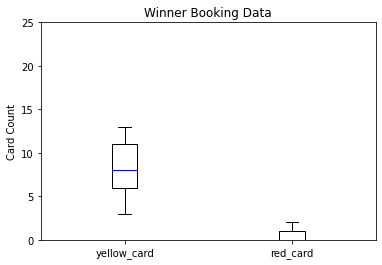

In [40]:
boxplot = winner_booking_info.boxplot(grid = False, color = dict(boxes = 'k', whiskers='k', medians='b'))
boxplot.set_ylabel('Card Count')
boxplot.set_xlabel('')
plt.ylim(0,25)
boxplot.set_title('Winner Booking Data')

Text(0.5, 1.0, 'NonWinner Booking Data')

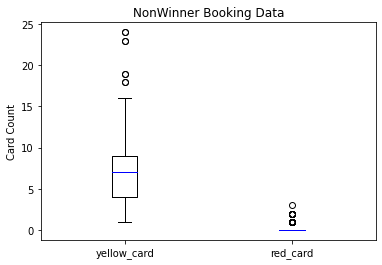

In [41]:
boxplot = non_winner_booking_info.boxplot(grid = False, color = dict(boxes = 'k', whiskers='k', medians='b'))
boxplot.set_ylabel('Card Count')
boxplot.set_xlabel('')
boxplot.set_title('NonWinner Booking Data')

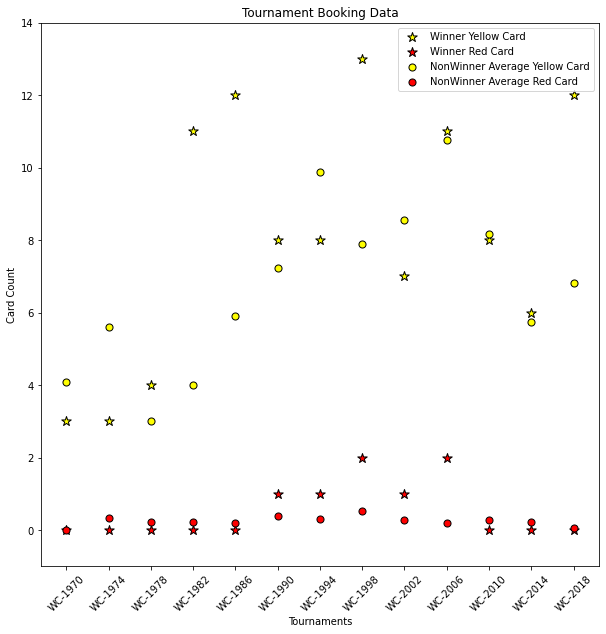

In [42]:
plt.figure(figsize=(10,10))
plt.scatter(tournaments, winner_yellow_card_count , marker= '*',s =100, facecolors="yellow", edgecolors="black", label = "Winner Yellow Card")
plt.scatter(tournaments, winner_red_card_count ,marker= '*',s =100, facecolors="red", edgecolors="black", label = "Winner Red Card")
plt.scatter(tournaments, nonwinner_yellow_card_count ,s =50, facecolors="yellow", edgecolors="black", label = "NonWinner Average Yellow Card")
plt.scatter(tournaments, nonwinner_red_card_count ,s =50, facecolors="red", edgecolors="black", label = "NonWinner Average Red Card")
plt.ylim(-1,14)
plt.xlabel("Tournaments")
plt.xticks(rotation=45)
plt.ylabel("Card Count")
plt.title("Tournament Booking Data")
plt.legend(loc='best')
plt.show()

In [43]:
import numpy as np 

In [44]:
m, b = np.polyfit(tournaments, winner_yellow_card_count, 1)

TypeError: can only concatenate str (not "float") to str

In [45]:
from scipy import stats
#Yellow card p-value for winners vs non winners
stats.ttest_ind(winner_yellow_card_count, nonwinner_yellow_card_count)

Ttest_indResult(statistic=1.218411662043792, pvalue=0.2349097501870385)

In [48]:
stats.ttest_ind(winner_yellow_card_count, nonwinner_red_card_count, equal_var=False)

Ttest_indResult(statistic=8.174100472861054, pvalue=2.956969532752301e-06)

In [46]:
#Red card p-value for winners vs non winners
stats.ttest_ind(winner_red_card_count, nonwinner_red_card_count)

Ttest_indResult(statistic=1.326705599626451, pvalue=0.19709204074150688)

In [47]:
stats.ttest_ind(winner_red_card_count, nonwinner_red_card_count, equal_var=False)

Ttest_indResult(statistic=1.326705599626451, pvalue=0.2079681187368157)